# Video Game Sales with Metacritic Ratings and Comments
This dataset is a combination of Gregory Smiths's web scrape of VGChartz's video game sales with accompanying variables from a web scrape of Metacritic by Rush Kirubi. VGChartz is a video game sales tracking website, and Metacritic is a review aggregator for movies, TV shows, music albums, and video games. 

Sources: https://www.kaggle.com/gregorut/videogamesales  
&emsp;&emsp;&emsp;&emsp;https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings, accessed on July 26th, 2020. 
 
The Metacritic scraper is based on https://github.com/wtamu-cisresearch/scraper, and the VGChartz scraper is available at https://github.com/GregorUT/vgchartzScrape, and is based on BeautifulSoup.

Not all of the VGChartz observations have accompanying Metacritic data, as Metacritic does not cover all video game platforms. Those that are covered may not have complete Metacritic data.
There are around 6,900 observations with complete VGChartz and Metacritic data.

The data are through December 22nd, 2016.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in data
df = pd.read_csv("D:/Jupyter Notebooks/VgChartzSales/game sales thru dec 22 2016.csv")

In [3]:
#Display top 50 rows
df.head(10)

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,1980.0,Action,0.32,0.02,0.0,0.00,0.34,0.0,0.0,0.0
1,1980.0,Fighting,0.72,0.04,0.0,0.01,0.77,0.0,0.0,0.0
2,1980.0,Misc,2.53,0.15,0.0,0.02,2.71,0.0,0.0,0.0
3,1980.0,Shooter,6.56,0.43,0.0,0.08,7.07,0.0,0.0,0.0
4,1980.0,Sports,0.46,0.03,0.0,0.01,0.49,0.0,0.0,0.0
5,1981.0,Action,13.86,0.81,0.0,0.12,14.84,0.0,0.0,0.0
6,1981.0,Platform,6.47,0.37,0.0,0.08,6.93,0.0,0.0,0.0
7,1981.0,Puzzle,2.09,0.13,0.0,0.03,2.24,0.0,0.0,0.0
8,1981.0,Racing,0.45,0.03,0.0,0.00,0.48,0.0,0.0,0.0
9,1981.0,Shooter,9.37,0.56,0.0,0.09,10.04,0.0,0.0,0.0


In [4]:
#Group by Year and Genre, getting sum totals, and filter to 2000-2011
dfCatYear = df.groupby(by = ["Year_of_Release", "Genre"]).sum()

dfCatYear.to_csv("D:/Jupyter Notebooks/VgChartzSales/game sales thru dec 22 2016.csv")
dfCatYear = pd.read_csv("D:/Jupyter Notebooks/VgChartzSales/game sales thru dec 22 2016.csv")
dfCatYear2000s = dfCatYear[dfCatYear["Year_of_Release"].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])]
dfCatYear2000s.head(10)

dfCatYear2000s.to_csv("D:/Jupyter Notebooks/VgChartzSales/2002sales.csv")

[Text(0.5, 255.71333333333342, 'Year of Release')]

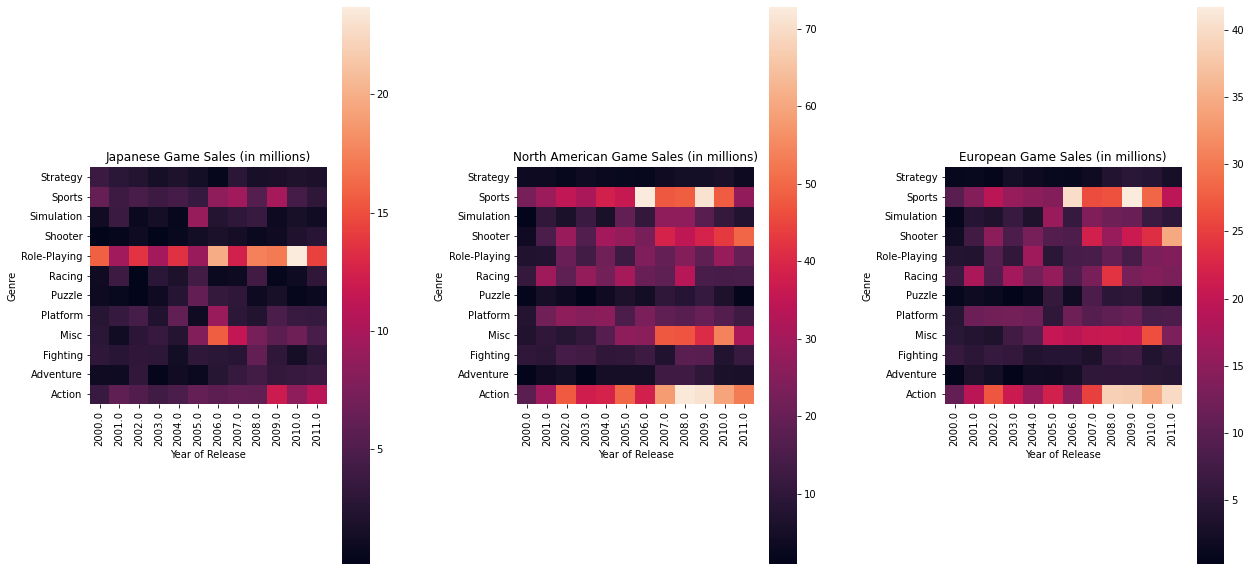

In [5]:
#Create arrays for heatmaps by region, and create heatmaps
arrayJP = dfCatYear2000s.pivot("Genre", "Year_of_Release", "JP_Sales")
arrayNA = dfCatYear2000s.pivot("Genre", "Year_of_Release", "NA_Sales")
arrayEU = dfCatYear2000s.pivot("Genre", "Year_of_Release", "EU_Sales")

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(19.2)
fig.set_figheight(10.8)
fig.tight_layout(pad = 10)

ax1 = sns.heatmap(arrayJP, ax=ax[0], square = True)
ax1.invert_yaxis()
ax1.set_title("Japanese Game Sales (in millions)")
ax1.set(xlabel="Year of Release")

ax2 = sns.heatmap(arrayNA, ax=ax[1], square = True)
ax2.invert_yaxis()
ax2.set_title("North American Game Sales (in millions)")
ax2.set(xlabel="Year of Release")

ax3 = sns.heatmap(arrayEU, ax=ax[2], square = True)
ax3.invert_yaxis()
ax3.set_title("European Game Sales (in millions)")
ax3.set(xlabel="Year of Release")